In [37]:
import pandas as pd
import sklearn as sk

In [38]:
from sklearn import datasets

In [39]:
diabetes = datasets.load_diabetes()

In [40]:
diabetes

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]], shape=(442, 10)),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142.

In [41]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

In [42]:
print(diabetes.feature_names)

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


In [43]:
# Create X and Y matrices
# Those will be the values which we will work on, target is the one we want to predict
X = diabetes.data
y = diabetes.target

In [44]:
X.shape

(442, 10)

In [45]:
y.shape

(442,)

## Data Split

In [46]:
# We need to split the data for the TRAIN - TEST set

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2)

In [47]:
X_train.shape, Y_train.shape

((353, 10), (353,))

In [48]:
Y_train.shape, Y_test.shape

((353,), (89,))

## Create Model: Linear Regression Model

In [49]:
# Create Model: Linear Regression Model

from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

# R2 value - the closer to 1, the better (in theory)

In [50]:
model = linear_model.LinearRegression() # define the model
model.fit(X_train, Y_train)

LinearRegression()

In [51]:
Y_pred = model.predict(X_test)

## Check The Predictions

In [52]:
# Print Model Performance
print(f"Coefficients: {model.coef_}")
# In linear regression, coefficients are the values that multiply the predictor values
print(f"Intercept {model.intercept_}")
# The y-intercept of a line is the value of y where the line crosses the y-axis. 
# In other words, it is the value of y when the value of x is equal to 0
print(f"Mean Square Error (MSE): %.2f" % mean_squared_error(Y_test, Y_pred))
print(f"Coefficient of determination (R2): %.2f" % r2_score(Y_test, Y_pred))


Coefficients: [  -39.52152769  -186.65389537   492.43345566   334.40220948
 -1161.10207257   802.47682209   332.39394536   278.2542899
   917.87766976    64.81862294]
Intercept 151.29015299934503
Mean Square Error (MSE): 2631.64
Coefficient of determination (R2): 0.50


# Regression Formula
$$Y = coef_1 * var_1 + coef_2 * var_2 + ... + coef_n * var_n$$

## Scatter Plots

In [80]:
import matplotlib.pyplot as plt
import numpy as np

In [81]:
Y_test

array([ 83.,  72., 172.,  77., 210., 243., 168., 139., 102., 273., 200.,
       164., 173., 160.,  49.,  86.,  80., 141., 248., 191., 200., 124.,
       183., 262.,  84., 275., 134., 174., 152., 170., 115., 242., 150.,
       156., 202.,  69.,  65., 131., 138., 246., 167., 195., 132., 102.,
       118., 272.,  67., 181., 293.,  96.,  63., 232.,  77., 252.,  66.,
        78.,  94., 268., 336.,  71.,  63., 104., 178., 201., 280., 137.,
        72., 180., 275., 101., 263., 164., 144.,  59.,  69., 233.,  55.,
       168., 198., 281., 101.,  53., 281., 162., 103., 209., 217., 168.,
        68.])

In [82]:
Y_pred

array([ 63.63691578,  99.73554411, 152.30426347,  70.64394856,
       144.88877063, 252.12656963, 122.46022863, 186.05276073,
       111.49359753, 244.99636735, 148.57988958, 185.70825283,
       217.10210673, 116.87407389,  95.65406078, 152.54818196,
        78.45598743, 173.42712128, 201.10074484, 194.01509296,
       173.05308694, 174.18227801, 115.93790407, 182.17561545,
       190.82629841, 217.37002012,  68.00753457, 174.30840292,
       106.20919914, 140.44992942,  90.99537797, 169.01858694,
       209.20208127, 157.2558975 , 208.56951734,  96.65603526,
       131.88454067, 121.1860646 ,  70.74015283, 227.22340478,
       178.2724695 , 232.72903112, 116.96738363,  97.79904149,
       101.66112408, 233.63243511, 125.87947633,  76.15429563,
       192.73154363,  82.20388224,  55.54899914, 190.0260531 ,
        82.46664502, 152.91716972, 174.40649379, 123.33445659,
       102.00186035, 231.71460035, 253.45761996, 117.19719519,
       111.61134757,  26.5810866 , 160.27653167,  76.97

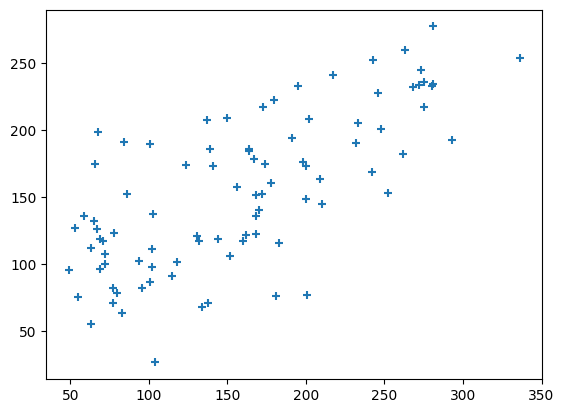

In [85]:
plt.scatter(Y_test, Y_pred)
plt.show()

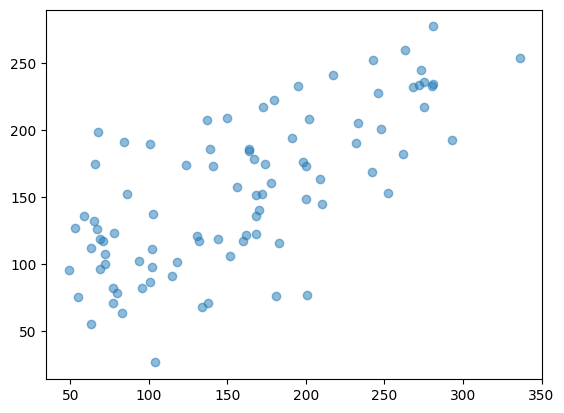

In [87]:
plt.scatter(Y_test, Y_pred, alpha=0.5)
plt.show()